# INVESTMENT CASE STUDY

### Case Study Brief:

**You work for Spark Funds, an asset management company. Spark Funds wants to make investments in a few companies. The CEO of Spark Funds wants to understand the global trends in investments so that she can take the investment decisions effectively.**

**Spark Funds has two minor constraints for investments:**

- **It wants to invest between 5 to 15 million USD per round of investment.**

- **It wants to invest only in English-speaking countries because of the ease of communication with the companies it would invest in.**

## Data Cleaning:

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
c=pd.read_excel('companies.xlsx')
r=pd.read_excel('rounds2.xlsx')

In [3]:
c

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,2014-09-04 00:00:00
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,2007-01-01 00:00:00
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,2010-01-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...
66363,/Organization/Zznode-Science-And-Technology-Co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66364,/Organization/Zzzzapp-Com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,2012-05-13 00:00:00
66365,/Organization/ÃEron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,2011-01-01 00:00:00
66366,/Organization/Ã”Asys-2,Ã”asys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,2014-01-01 00:00:00


In [4]:
r

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,2015-01-05,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,2014-10-14,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,2014-03-01,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,2014-01-30,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2008-03-19,2000000.0
...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,2014-03-01,41313.0
114945,/ORGANIZATION/ZZZZAPP-COM,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,2013-05-01,32842.0
114946,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,2014-08-01,NaN
114947,/ORGANIZATION/Ã”ASYS-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,2015-01-01,18192.0


In [5]:
c.shape

(66368, 10)

In [6]:
# Checking for unique values.
len(c.permalink.unique())

66368

In [7]:
r.shape

(114949, 6)

In [8]:
len(r.company_permalink.unique())

90247

In [9]:
# Number of unique company_permalink is not equal to 66368. This may be because of casing issue.
# hence we convert entire company_permalink and permalink to lower case.
c.permalink=c.permalink.str.lower()
r.company_permalink=r.company_permalink.str.lower()

In [10]:
c.permalink

0                                      /organization/-fame
1                                   /organization/-qounter
2                      /organization/-the-one-of-them-inc-
3                                    /organization/0-6-com
4                           /organization/004-technologies
                               ...                        
66363    /organization/zznode-science-and-technology-co...
66364                            /organization/zzzzapp-com
66365                                 /organization/ãeron
66366                               /organization/ã”asys-2
66367    /organization/ä°novatiff-reklam-ve-tanä±tä±m-h...
Name: permalink, Length: 66368, dtype: object

In [11]:
r.company_permalink

0                                       /organization/-fame
1                                    /organization/-qounter
2                                    /organization/-qounter
3                       /organization/-the-one-of-them-inc-
4                                     /organization/0-6-com
                                ...                        
114944                            /organization/zzzzapp-com
114945                            /organization/zzzzapp-com
114946                                 /organization/ãeron
114947                               /organization/ã”asys-2
114948    /organization/ä°novatiff-reklam-ve-tanä±tä±m-h...
Name: company_permalink, Length: 114949, dtype: object

In [12]:
# Now checking unique company_permalink in r
len(r.company_permalink.unique())

66368

In [13]:
len(c.permalink.unique())

66368

In [14]:
# Hence there are same number of unique enteries in r.company_permalink and c.permalink.
# Now lets check if these two are same:
c[~(c.permalink.isin(r.company_permalink))]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at


## Missing Value Treatment:

Now we check for missing values in both the dataframes. 



In [15]:
# Check missing values in c dataframe:
c.isnull().sum()

permalink            0
name                 5
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [16]:
# Check missing values in c dataframe:
r.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [17]:
# Since there is no any missing values in c.permalink and r.company_permalink, We can merge these two DataFrames.
# Before merging we do rename company_permalink to permalink, so that we can merge on each other.
r.rename(columns={'company_permalink':'permalink'},inplace=True)
r

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,2015-01-05,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,2014-10-14,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,2014-03-01,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,2014-01-30,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2008-03-19,2000000.0
...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,2014-03-01,41313.0
114945,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,2013-05-01,32842.0
114946,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,2014-08-01,NaN
114947,/organization/ã”asys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,2015-01-01,18192.0


In [18]:
# Now merging the two DataFrames:
df=pd.merge(c,r,how='inner',on='permalink')
df

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,2015-01-05,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,2014-09-04 00:00:00,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,2014-10-14,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,2014-09-04 00:00:00,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,2014-03-01,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,2014-01-30,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,2007-01-01 00:00:00,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2008-03-19,2000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,2012-05-13 00:00:00,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,2014-03-01,41313.0
114945,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,2012-05-13 00:00:00,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,2013-05-01,32842.0
114946,/organization/ãeron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,2011-01-01 00:00:00,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,2014-08-01,NaN
114947,/organization/ã”asys-2,Ã”asys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,2014-01-01 00:00:00,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,2015-01-01,18192.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   permalink                114949 non-null  object        
 1   name                     114944 non-null  object        
 2   homepage_url             108815 non-null  object        
 3   category_list            111539 non-null  object        
 4   status                   114949 non-null  object        
 5   country_code             106271 non-null  object        
 6   state_code               104003 non-null  object        
 7   region                   104782 non-null  object        
 8   city                     104785 non-null  object        
 9   founded_at               94428 non-null   object        
 10  funding_round_permalink  114949 non-null  object        
 11  funding_round_type       114949 non-null  object        
 12  funding_round_co

In [20]:
# Checking for null values in df:
df.isnull().sum()

permalink                      0
name                           5
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [21]:
# Checking for null values in percentage:
round((df.isnull().sum()/len(df.index)*100),2)

permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

Clearly, the column funding_round_code is useless (with about 73% missing values). Also, for the business objectives given, the columns homepage_url, founded_at, state_code, region and city need not be used.

Thus, let's drop these columns.

In [22]:
# Now dropping columns:
df=df.drop(['funding_round_code', 'homepage_url', 'founded_at', 'state_code', 'region', 'city'], axis=1)
df

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,2015-01-05,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,2014-10-14,NaN
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,2014-03-01,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,2014-01-30,3406878.0
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,2008-03-19,2000000.0
...,...,...,...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,2014-03-01,41313.0
114945,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,2013-05-01,32842.0
114946,/organization/ãeron,ÃERON,NaN,operating,NaN,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,2014-08-01,NaN
114947,/organization/ã”asys-2,Ã”asys,Consumer Electronics|Internet of Things|Teleco...,operating,USA,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,2015-01-01,18192.0


In [23]:
# Now again checking for missing values:
round((df.isnull().sum()/len(df.index)*100),2)

permalink                   0.00
name                        0.00
category_list               2.97
status                      0.00
country_code                7.55
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

Note that the column raised_amount_usd is an important column, since that is the number we want to analyse (compare, means, sum etc.). That needs to be carefully treated.

Also, the column country_code will be used for country-wise analysis, and category_list will be used to merge the dataframe with the main categories.

Now we see how we can deal with missing values in raised_amount_usd.

In [24]:
df.raised_amount_usd.describe()

count    9.495900e+04
mean     1.042687e+07
std      1.148212e+08
min      0.000000e+00
25%      3.225000e+05
50%      1.680511e+06
75%      7.000000e+06
max      2.127194e+10
Name: raised_amount_usd, dtype: float64

The mean is somewhere around USD 10 million, while the median is only about USD 1m. The min and max values are also miles apart.

In general, since there is a huge spread in the funding amounts, it will be inappropriate to impute it with a metric such as median or mean. Also, since we have quite a large number of observations, it is wiser to just drop the rows.

We thus remove the rows having NaNs in raised_amount_usd.

In [25]:
# Removing NaNs in raised_amount_usd:
df=df[~(np.isnan(df.raised_amount_usd))]
df

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,2015-01-05,10000000.0
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,2014-03-01,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,2014-01-30,3406878.0
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,2008-03-19,2000000.0
6,/organization/01games-technology,01Games Technology,Games,operating,HKG,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,2014-07-01,41250.0
...,...,...,...,...,...,...,...,...,...
114943,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV,/funding-round/6ba41360588bc6e3f77e9b50a0ebfafa,seed,2013-08-01,33149.0
114944,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,2014-03-01,41313.0
114945,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,2013-05-01,32842.0
114947,/organization/ã”asys-2,Ã”asys,Consumer Electronics|Internet of Things|Teleco...,operating,USA,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,2015-01-01,18192.0


In [26]:
# Now again checking for missing values:
round((df.isnull().sum()/len(df.index)*100),2)

permalink                  0.00
name                       0.01
category_list              1.10
status                     0.00
country_code               6.16
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

In [27]:
df.country_code.value_counts()

USA    62049
GBR     5019
CAN     2616
CHN     1927
IND     1649
       ...  
OMN        1
SEN        1
IRN        1
KNA        1
LAO        1
Name: country_code, Length: 134, dtype: int64

We can see that most number of investments have happened in USA. We can also see the fractions.

In [28]:
round(((df.country_code.value_counts()/len(df.index))*100),2)

USA    65.34
GBR     5.29
CAN     2.75
CHN     2.03
IND     1.74
       ...  
OMN     0.00
SEN     0.00
IRN     0.00
KNA     0.00
LAO     0.00
Name: country_code, Length: 134, dtype: float64

Now, we can either delete the rows having country_code missing (about 6% rows), or we can impute them by USA. Since the number 6 is quite small, and we have a decent amount of data, it may be better to just remove the rows.

In [29]:
# Deleting rows with NaN country_code:
df=df[~(df.country_code.isnull())]
df

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,2015-01-05,10000000.0
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,2014-03-01,700000.0
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,2008-03-19,2000000.0
6,/organization/01games-technology,01Games Technology,Games,operating,HKG,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,2014-07-01,41250.0
7,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,2009-09-11,43360.0
...,...,...,...,...,...,...,...,...,...
114942,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV,/funding-round/22ef2fafb4d20ac3aa4b86143dbf6c8e,seed,2011-11-01,7000.0
114943,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV,/funding-round/6ba41360588bc6e3f77e9b50a0ebfafa,seed,2013-08-01,33149.0
114944,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,2014-03-01,41313.0
114945,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,2013-05-01,32842.0


In [30]:
# Now again checking for missing values:
round((df.isnull().sum()/len(df.index)*100),2)

permalink                  0.00
name                       0.00
category_list              0.65
status                     0.00
country_code               0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

Here the fraction of missing values in the remaining dataframe has also reduced now - only 0.65% in category_list. We thus remove those as well.

Here we could have simply let the missing values in the dataset and continued the analysis. But in this case, since we will use that column later for merging with the 'main_categories', removing the missing values will be quite convenient (and again - we have enough data).

In [31]:
df=df[~(df.category_list.isnull())]
df

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,2015-01-05,10000000.0
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,2014-03-01,700000.0
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,2008-03-19,2000000.0
6,/organization/01games-technology,01Games Technology,Games,operating,HKG,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,2014-07-01,41250.0
7,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,2009-09-11,43360.0
...,...,...,...,...,...,...,...,...,...
114942,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV,/funding-round/22ef2fafb4d20ac3aa4b86143dbf6c8e,seed,2011-11-01,7000.0
114943,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV,/funding-round/6ba41360588bc6e3f77e9b50a0ebfafa,seed,2013-08-01,33149.0
114944,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,2014-03-01,41313.0
114945,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,2013-05-01,32842.0


In [32]:
# Now again checking for missing values:
round((df.isnull().sum()/len(df.index)*100),2)

permalink                  0.0
name                       0.0
category_list              0.0
status                     0.0
country_code               0.0
funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
dtype: float64

In [33]:
# After missing value treatment, approx 77% observations are retained:
(len(df.index)/114949)*100

77.01589400516751

# Analysis
Here, we'll conduct three types of analyses - funding type, country analysis, and sector analysis.
## Funding Type Analysis:
Here we compare the funding amounts across the funding types. Also, we need to impose the constraint that the investment amount should be between 5 and 15 million USD. We will choose the funding type such that the average investment amount falls in this range.

In [34]:
# First, let's filter the df so it only contains the four specified funding types
df = df[(df.funding_round_type == "venture") | (df.funding_round_type == "angel") | 
        (df.funding_round_type == "seed")    | (df.funding_round_type == "private_equity") ]
df

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,2015-01-05,10000000.0
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,2014-03-01,700000.0
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,2008-03-19,2000000.0
7,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,2009-09-11,43360.0
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,2009-12-21,719491.0
...,...,...,...,...,...,...,...,...,...
114941,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,Enterprise Software,operating,CHN,/funding-round/171693e1e07e0230defd8fddb6de4515,venture,2012-04-01,1587301.0
114942,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV,/funding-round/22ef2fafb4d20ac3aa4b86143dbf6c8e,seed,2011-11-01,7000.0
114943,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV,/funding-round/6ba41360588bc6e3f77e9b50a0ebfafa,seed,2013-08-01,33149.0
114945,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,2013-05-01,32842.0


Now, we have to compute a **representative value of the funding amount** for each type of invesstment. Here we can either choose the mean or the median.


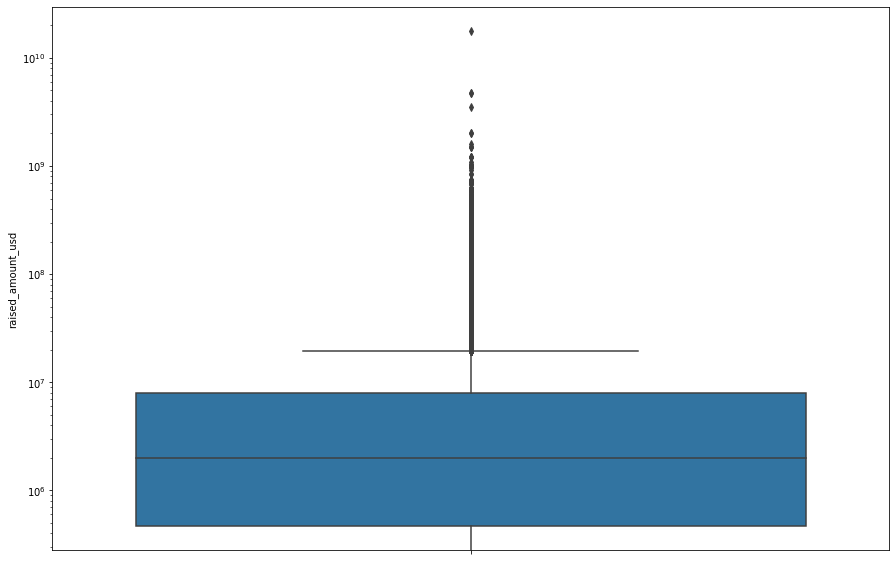

In [35]:
# Plot of distribution of 'raised_amount_usd' using boxplot.
plt.figure(figsize=[15,10])
sns.boxplot(y=df.raised_amount_usd)
plt.yscale('log')
plt.show()

In [36]:
df.raised_amount_usd.describe()

count    7.512400e+04
mean     9.519475e+06
std      7.792778e+07
min      0.000000e+00
25%      4.705852e+05
50%      2.000000e+06
75%      8.000000e+06
max      1.760000e+10
Name: raised_amount_usd, dtype: float64

Here we can see that there is a significant difference between the mean and the median - USD 9.5m and USD 2m. 

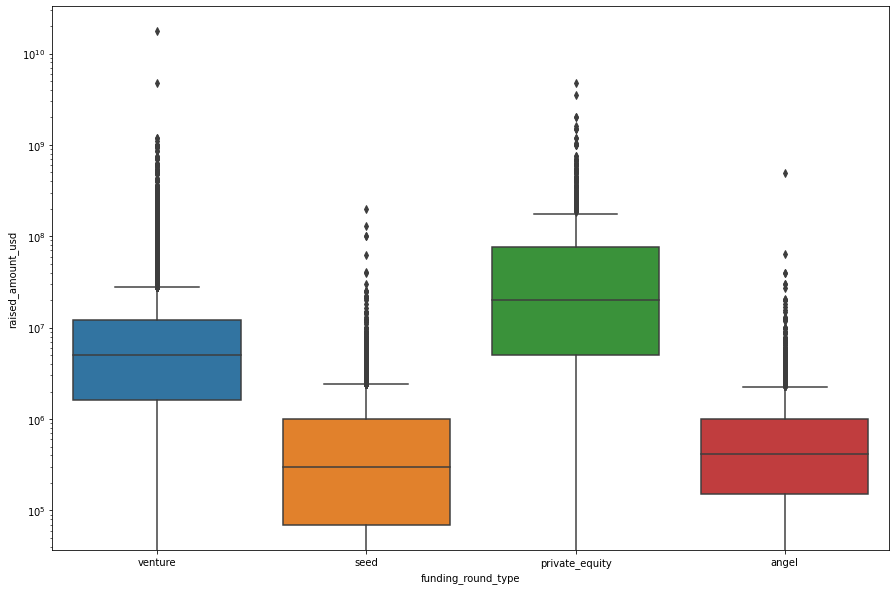

In [37]:
plt.figure(figsize=[15,10])
sns.boxplot(x='funding_round_type',y='raised_amount_usd',data=df)
plt.yscale('log')
plt.show()

In [38]:
pd.pivot_table(data=df,columns='funding_round_type',values='raised_amount_usd',aggfunc=[np.mean,np.median])

mean                                              \
funding_round_type          angel private_equity           seed       venture   
raised_amount_usd   971573.891136   7.393849e+07  747793.682484  1.172422e+07   

                      median                                      
funding_round_type     angel private_equity      seed    venture  
raised_amount_usd   414906.0     20000000.0  300000.0  5000000.0

From the above boxplot we can see there are few extreme in the raised_amount_usd accross each funding type, which will boost the mean up as can be seen from the pivot table. **Hence median can be the best representative value of the funding amount across each funding type**.

In [39]:
# Comparing the median values across categories:
df.groupby('funding_round_type')['raised_amount_usd'].median().sort_values(ascending=False)

funding_round_type
private_equity    20000000.0
venture            5000000.0
angel               414906.0
seed                300000.0
Name: raised_amount_usd, dtype: float64

The median investment amount for type 'private_equity' is approx. USD 20m, which is beyond Spark Funds' range of 5-15m. The median of 'venture' type is about USD 5m, which is suitable for them. The average amounts of angel and seed types are lower than their range.

Thus, 'venture' type investment will be most suited to them.

## Country Analysis:

Now we compare the total investment amounts across countries. 
Before proceeding we will filter the data for only the 'venture' type investments and then compare the 'total investment' across countries.

In [40]:
# Filtering df for only venture type
df=df[df.funding_round_type=='venture']
df

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,2015-01-05,10000000.0
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,2008-03-19,2000000.0
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,2009-12-21,719491.0
10,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,2015-11-09,20000000.0
11,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,2013-01-03,1700000.0
...,...,...,...,...,...,...,...,...,...
114931,/organization/zyraz-technology,Zyraz Technology,Biotechnology,closed,MYS,/funding-round/e949f077c943db197f20e43c2eb8d0e6,venture,2009-10-09,7991547.0
114934,/organization/zyrra,Zyrra,E-Commerce,operating,USA,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,2012-10-18,140500.0
114936,/organization/zystor,Zystor,Biotechnology,acquired,USA,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,2004-12-16,8500000.0
114937,/organization/zytoprotec,Zytoprotec,Biotechnology,operating,AUT,/funding-round/0c43e717298296d2fb334fb236300f6e,venture,2013-01-29,2686600.0


In [41]:
# Grouping by country codes and comparing the total funding amounts
df.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)

country_code
USA    4.200680e+11
CHN    3.933892e+10
GBR    2.007281e+10
IND    1.426151e+10
CAN    9.482218e+09
           ...     
MCO    6.570000e+05
SAU    5.000000e+05
CMR    3.595610e+05
GTM    3.000000e+05
MMR    2.000000e+05
Name: raised_amount_usd, Length: 97, dtype: float64

In [42]:
# Now we extract the top 9 countries from the above list:
df.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)[0:9]

country_code
USA    4.200680e+11
CHN    3.933892e+10
GBR    2.007281e+10
IND    1.426151e+10
CAN    9.482218e+09
FRA    7.226851e+09
ISR    6.854350e+09
DEU    6.306922e+09
JPN    3.167647e+09
Name: raised_amount_usd, dtype: float64

Among the top 9 countries, USA, GBR and IND are the top three English speaking countries. Hence we filter the dataframe so that it contains only the top 3 countries.

In [43]:
df=df[((df.country_code=='USA')|(df.country_code=='GBR')|(df.country_code=='IND'))]
df

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,2015-01-05,10000000.0
10,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,2015-11-09,20000000.0
11,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,2013-01-03,1700000.0
12,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,2014-07-19,8900000.0
22,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,2015-03-17,5000000.0
...,...,...,...,...,...,...,...,...,...
114920,/organization/zyomyx-inc,ZYOMYX,Biotechnology,operating,USA,/funding-round/4191cb5258d3863b0212d1083881da64,venture,2013-06-30,12000000.0
114922,/organization/zyomyx-inc,ZYOMYX,Biotechnology,operating,USA,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,2013-07-11,14219999.0
114923,/organization/zyomyx-inc,ZYOMYX,Biotechnology,operating,USA,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,2010-01-29,555016.0
114934,/organization/zyrra,Zyrra,E-Commerce,operating,USA,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,2012-10-18,140500.0


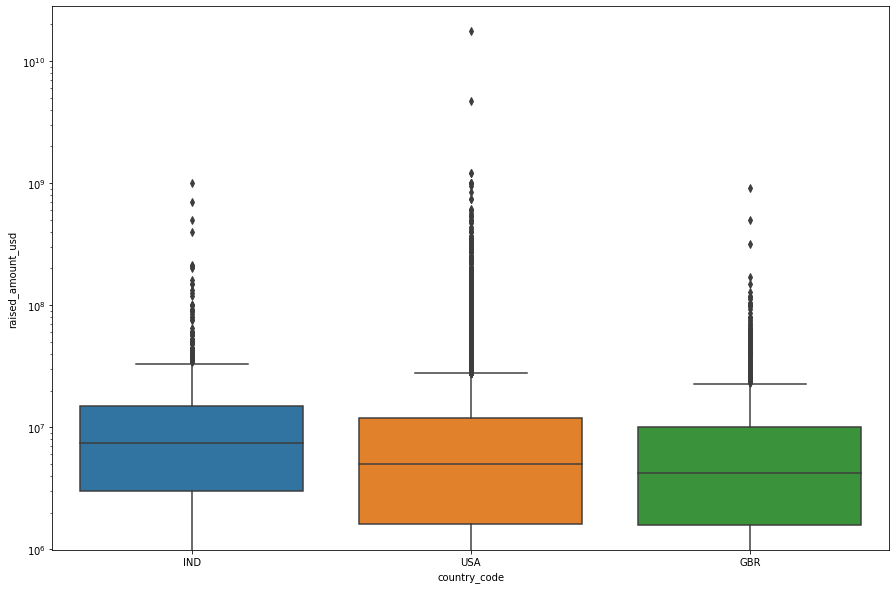

In [44]:
# boxplot to see distributions of funding amount across countries:
plt.figure(figsize=[15,10])
sns.boxplot(data=df,x='country_code',y='raised_amount_usd')
plt.yscale('log')
plt.show()

Now, we have shortlisted the investment type (venture) and the three countries. Let's now choose the sectors.

## Sector Analysis:
First, we need to extract the main sector using the column category_list. 

In [45]:
df.category_list

0                                    Media
10                               Analytics
11                               Analytics
12                               Analytics
22        Apps|Cable|Distribution|Software
                        ...               
114920                       Biotechnology
114922                       Biotechnology
114923                       Biotechnology
114934                          E-Commerce
114936                       Biotechnology
Name: category_list, Length: 38803, dtype: object

The category_list column contains values such as 'Apps|Cable|Distribution|Software' - in this, 'Apps' is the 'Primary category' of the company, which we need to use.

Hence now we extract only the main categories.

In [46]:
df.category_list=df.category_list.apply(lambda x:x.split('|')[0])
df

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,2015-01-05,10000000.0
10,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,2015-11-09,20000000.0
11,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,2013-01-03,1700000.0
12,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,2014-07-19,8900000.0
22,/organization/1-mainstream,1 Mainstream,Apps,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,2015-03-17,5000000.0
...,...,...,...,...,...,...,...,...,...
114920,/organization/zyomyx-inc,ZYOMYX,Biotechnology,operating,USA,/funding-round/4191cb5258d3863b0212d1083881da64,venture,2013-06-30,12000000.0
114922,/organization/zyomyx-inc,ZYOMYX,Biotechnology,operating,USA,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,2013-07-11,14219999.0
114923,/organization/zyomyx-inc,ZYOMYX,Biotechnology,operating,USA,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,2010-01-29,555016.0
114934,/organization/zyrra,Zyrra,E-Commerce,operating,USA,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,2012-10-18,140500.0


In [47]:
# Importing mapping DataFrame:
m=pd.read_csv('mapping.csv')
m

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
683,Wholesale,0,0,0,0,0,0,0,1,0
684,Wine And Spirits,0,0,0,1,0,0,0,0,0
685,Wireless,0,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,0,1,0


In [48]:
# Checking for null values:
m.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [49]:
# Deleting the row with null value:
m=m[~(m.category_list.isnull())]
m

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
683,Wholesale,0,0,0,0,0,0,0,1,0
684,Wine And Spirits,0,0,0,1,0,0,0,0,0
685,Wireless,0,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,0,1,0


In [50]:
# Now before merging m with df, let us first convert the category_list to lower case in both the DataFrames:
df.category_list=df.category_list.str.lower()
m.category_list=m.category_list.str.lower()
df.category_list

0                 media
10            analytics
11            analytics
12            analytics
22                 apps
              ...      
114920    biotechnology
114922    biotechnology
114923    biotechnology
114934       e-commerce
114936    biotechnology
Name: category_list, Length: 38803, dtype: object

In [51]:
m.category_list

1                    3d
2           3d printing
3         3d technology
4            accounting
5      active lifestyle
             ...       
683           wholesale
684    wine and spirits
685            wireless
686               women
687        young adults
Name: category_list, Length: 687, dtype: object

In [52]:
# Merging m and df on category_list:
mdf=pd.merge(df,m,how='inner',on='category_list')
mdf

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,/organization/-fame,#fame,media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,2015-01-05,10000000.0,0,0,0,1,0,0,0,0,0
1,/organization/90min,90min,media,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,2015-10-06,15000000.0,0,0,0,1,0,0,0,0,0
2,/organization/90min,90min,media,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,2013-05-07,5800000.0,0,0,0,1,0,0,0,0,0
3,/organization/90min,90min,media,operating,GBR,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,2014-03-26,18000000.0,0,0,0,1,0,0,0,0,0
4,/organization/all-def-digital,All Def Digital,media,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,2014-08-06,5000000.0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36182,/organization/yapta,Yapta,tracking,operating,USA,/funding-round/67e2a4f223ba195d75c516c02157e269,venture,2010-12-29,3500000.0,0,0,0,0,0,0,0,1,0
36183,/organization/yapta,Yapta,tracking,operating,USA,/funding-round/b1777df10578e852be3afbe3bc325435,venture,2013-07-22,4220000.0,0,0,0,0,0,0,0,1,0
36184,/organization/yapta,Yapta,tracking,operating,USA,/funding-round/ed75e1064eb8b50c01c2e0b691ca9f1e,venture,2009-06-25,2000000.0,0,0,0,0,0,0,0,1,0
36185,/organization/yapta,Yapta,tracking,operating,USA,/funding-round/fc066baf3121b060b574214612a6c946,venture,2015-07-29,1786563.0,0,0,0,0,0,0,0,1,0


In [53]:
# Relacing 1 with the corresponding column name:
for x in mdf.columns[9::]:
    mdf[x]=mdf[x].apply(lambda y:x if y==1 else '')
mdf

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,/organization/-fame,#fame,media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,2015-01-05,10000000.0,,,,Entertainment,,,,,
1,/organization/90min,90min,media,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,2015-10-06,15000000.0,,,,Entertainment,,,,,
2,/organization/90min,90min,media,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,2013-05-07,5800000.0,,,,Entertainment,,,,,
3,/organization/90min,90min,media,operating,GBR,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,2014-03-26,18000000.0,,,,Entertainment,,,,,
4,/organization/all-def-digital,All Def Digital,media,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,2014-08-06,5000000.0,,,,Entertainment,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36182,/organization/yapta,Yapta,tracking,operating,USA,/funding-round/67e2a4f223ba195d75c516c02157e269,venture,2010-12-29,3500000.0,,,,,,,,Others,
36183,/organization/yapta,Yapta,tracking,operating,USA,/funding-round/b1777df10578e852be3afbe3bc325435,venture,2013-07-22,4220000.0,,,,,,,,Others,
36184,/organization/yapta,Yapta,tracking,operating,USA,/funding-round/ed75e1064eb8b50c01c2e0b691ca9f1e,venture,2009-06-25,2000000.0,,,,,,,,Others,
36185,/organization/yapta,Yapta,tracking,operating,USA,/funding-round/fc066baf3121b060b574214612a6c946,venture,2015-07-29,1786563.0,,,,,,,,Others,


In [54]:
# Creating new column named Sector:
mdf['Sector']=''
for x in mdf.columns[9:-1]:
    mdf['Sector']=mdf['Sector']+mdf[x]
mdf

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",Sector
0,/organization/-fame,#fame,media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,2015-01-05,10000000.0,,,,Entertainment,,,,,,Entertainment
1,/organization/90min,90min,media,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,2015-10-06,15000000.0,,,,Entertainment,,,,,,Entertainment
2,/organization/90min,90min,media,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,2013-05-07,5800000.0,,,,Entertainment,,,,,,Entertainment
3,/organization/90min,90min,media,operating,GBR,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,2014-03-26,18000000.0,,,,Entertainment,,,,,,Entertainment
4,/organization/all-def-digital,All Def Digital,media,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,2014-08-06,5000000.0,,,,Entertainment,,,,,,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36182,/organization/yapta,Yapta,tracking,operating,USA,/funding-round/67e2a4f223ba195d75c516c02157e269,venture,2010-12-29,3500000.0,,,,,,,,Others,,Others
36183,/organization/yapta,Yapta,tracking,operating,USA,/funding-round/b1777df10578e852be3afbe3bc325435,venture,2013-07-22,4220000.0,,,,,,,,Others,,Others
36184,/organization/yapta,Yapta,tracking,operating,USA,/funding-round/ed75e1064eb8b50c01c2e0b691ca9f1e,venture,2009-06-25,2000000.0,,,,,,,,Others,,Others
36185,/organization/yapta,Yapta,tracking,operating,USA,/funding-round/fc066baf3121b060b574214612a6c946,venture,2015-07-29,1786563.0,,,,,,,,Others,,Others


In [55]:
#Dropping the columns with sector names:
mdf=mdf.drop(list(mdf.columns[9:-1]),axis=1)
mdf

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,Sector
0,/organization/-fame,#fame,media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,2015-01-05,10000000.0,Entertainment
1,/organization/90min,90min,media,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,2015-10-06,15000000.0,Entertainment
2,/organization/90min,90min,media,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,2013-05-07,5800000.0,Entertainment
3,/organization/90min,90min,media,operating,GBR,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,2014-03-26,18000000.0,Entertainment
4,/organization/all-def-digital,All Def Digital,media,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,2014-08-06,5000000.0,Entertainment
...,...,...,...,...,...,...,...,...,...,...
36182,/organization/yapta,Yapta,tracking,operating,USA,/funding-round/67e2a4f223ba195d75c516c02157e269,venture,2010-12-29,3500000.0,Others
36183,/organization/yapta,Yapta,tracking,operating,USA,/funding-round/b1777df10578e852be3afbe3bc325435,venture,2013-07-22,4220000.0,Others
36184,/organization/yapta,Yapta,tracking,operating,USA,/funding-round/ed75e1064eb8b50c01c2e0b691ca9f1e,venture,2009-06-25,2000000.0,Others
36185,/organization/yapta,Yapta,tracking,operating,USA,/funding-round/fc066baf3121b060b574214612a6c946,venture,2015-07-29,1786563.0,Others


The dataframe now contains only venture type investments in countries USA, IND and GBR, and we have mapped each company to one of the eight main sectors (named 'Sector' in the dataframe).

We can now compute the sector-wise number and the amount of investment in the three countries.

In [56]:
# Summarising the sector-wise number and sum of venture investments across three countries
# First, filtering for investment range between 5 million and 15 million.
mdf=mdf[(mdf['raised_amount_usd']>= 5000000) & (mdf['raised_amount_usd'] <= 15000000)]
mdf

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,Sector
0,/organization/-fame,#fame,media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,2015-01-05,10000000.0,Entertainment
1,/organization/90min,90min,media,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,2015-10-06,15000000.0,Entertainment
2,/organization/90min,90min,media,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,2013-05-07,5800000.0,Entertainment
4,/organization/all-def-digital,All Def Digital,media,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,2014-08-06,5000000.0,Entertainment
14,/organization/chefs-feed,ChefsFeed,media,operating,USA,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,2015-02-26,5000000.0,Entertainment
...,...,...,...,...,...,...,...,...,...,...
36171,/organization/wizrocket-technologies,CleverTap,consumer behavior,operating,USA,/funding-round/195738852853780cc8f1220ba6fb761d,venture,2015-08-03,8000000.0,"Social, Finance, Analytics, Advertising"
36175,/organization/user-interface,User Interface,user interface,operating,USA,/funding-round/ade267714c6ee533323f46a25b2db237,venture,2001-01-24,8250000.0,Others
36176,/organization/vector-watch,Vector Watch,watch,operating,GBR,/funding-round/b010e14f723a45d5c8fadb5a857c620b,venture,2015-11-25,5000000.0,Others
36177,/organization/washio,Washio,service industries,operating,USA,/funding-round/59026d26012c63b42fa2984c8f3c41ec,venture,2014-06-09,10500000.0,Others


In [57]:
mdf.groupby(['country_code','Sector'])['raised_amount_usd'].agg(['count','sum'])

count           sum
country_code Sector                                                      
GBR          Automotive & Sports                         16  1.670516e+08
             Cleantech / Semiconductors                 127  1.136905e+09
             Entertainment                               54  4.615111e+08
             Health                                      24  2.145375e+08
             Manufacturing                               42  3.619403e+08
             News, Search and Messaging                  73  6.157462e+08
             Others                                     143  1.249124e+09
             Social, Finance, Analytics, Advertising     98  8.218884e+08
IND          Automotive & Sports                         13  1.369000e+08
             Cleantech / Semiconductors                  20  1.653800e+08
             Entertainment                               33  2.808300e+08
             Health                                      19  1.677400e+08
             Manufacturing                               21  2.009000e+08
             News, Search and Messaging                  52  4.338345e+08
             Others                                     109  1.007410e+09
             Social, Finance, Analytics, Advertising     32  2.905435e+08
USA          Automotive & Sports                        167  1.454104e+09
             Cleantech / Semiconductors                2297  2.118100e+10
             Entertainment                              580  5.000213e+09
             Health                                     908  8.200859e+09
             Manufacturing                              799  7.258553e+09
             News, Search and Messaging                1563  1.379682e+10
             Others                                    2923  2.608928e+10
             Social, Finance, Analytics, Advertising   1912  1.668070e+10

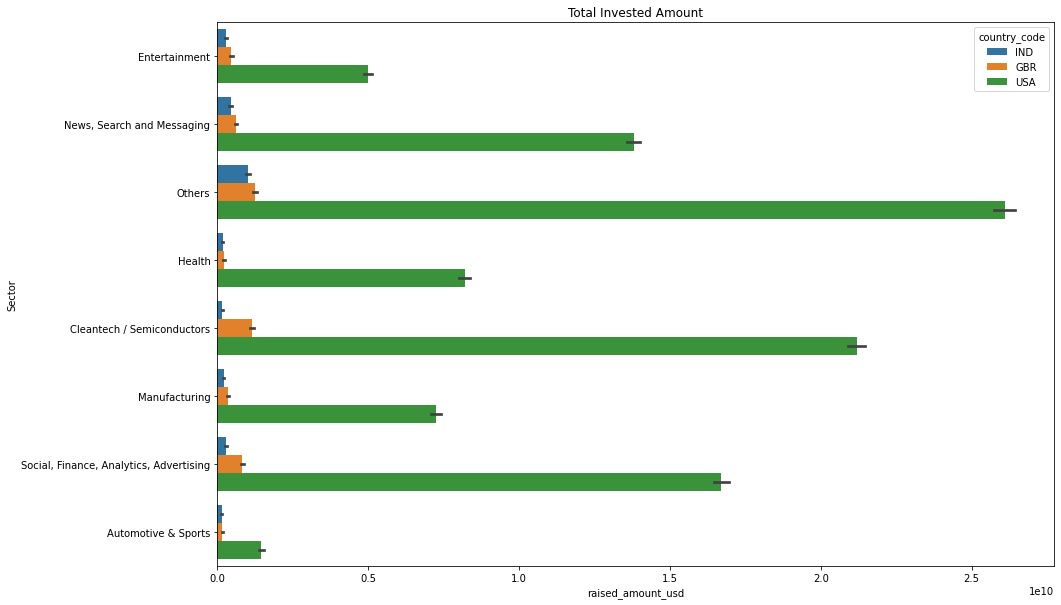

In [58]:
# Plotting sector-wise sum of investments in the three countries
plt.figure(figsize=[15,10])
sns.barplot(data=mdf,y='Sector',x='raised_amount_usd',hue='country_code',estimator=np.sum)
plt.title('Total Invested Amount')
plt.show()

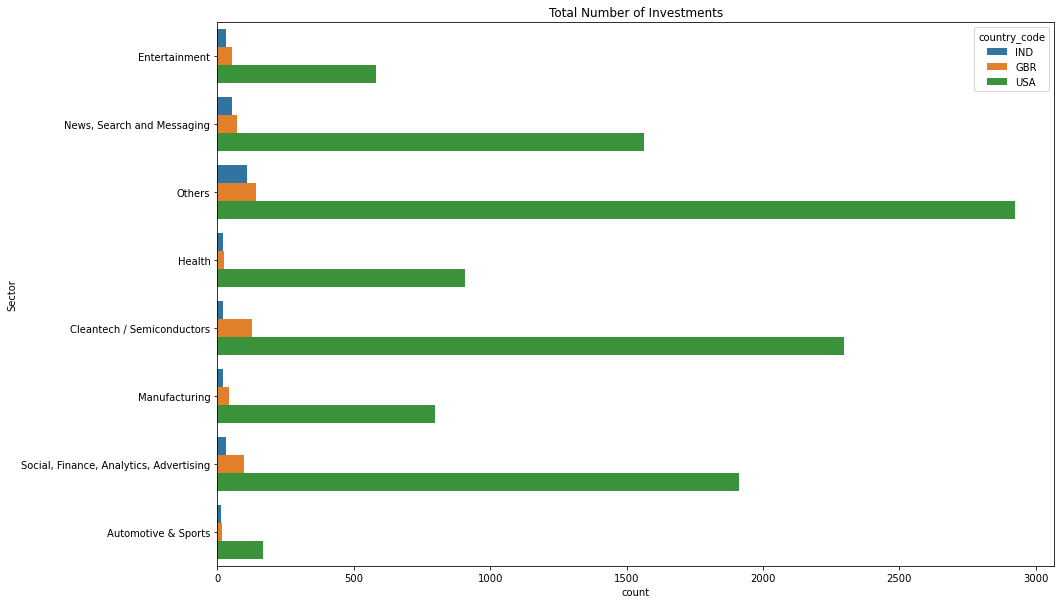

In [59]:
# Plotting sector-wise count of investments in the three countries:
plt.figure(figsize=[15,10])
sns.countplot(data=mdf,y='Sector',hue='country_code')
plt.title('Total Number of Investments')
plt.show()

**Thus, the top country in terms of the number of investments (and the total amount invested) is the USA.**

**The sectors 'Others', 'Social, Finance, Analytics and Advertising' and 'Cleantech/Semiconductors' are the most heavily invested ones.**